In [1]:
import numpy as np
import pandas as pd

#### Loading test data

In [2]:
test = pd.read_csv('test_lAUu6dG.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
test.shape

(367, 12)

In [5]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

#### dropping Loan_ID column

In [4]:
Loan_id = test.Loan_ID

In [6]:
test1 = test.drop('Loan_ID', axis=1)

In [7]:
test2 = test1.copy()

#### Preparing Gender column

In [8]:
test2.Gender = test1.Gender.fillna(value='no_gender')

In [9]:
pd.get_dummies(test2.Gender)

,Female,Male,no_gender
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
362,0,1,0
363,0,1,0
364,0,1,0
365,0,1,0


In [10]:
test2 = pd.concat([test2, pd.get_dummies(test2.Gender).drop('no_gender', axis='columns')], axis='columns')

In [11]:
test3 = test2.drop('Gender',axis=1)
test3.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male
0,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0,1
1,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0,1
2,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0,1
3,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0,1
4,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0,1


#### Preparing Married column

In [12]:
test4 = pd.concat([test3.drop('Married', axis='columns'),pd.get_dummies(test3.Married,prefix='Married',drop_first=True)], axis=1)

In [13]:
test6 = test4.copy()

#### Preparing Dependents column

In [14]:
test6.Dependents.isnull().sum()

10

In [15]:
test7 = pd.concat([test6.drop('Dependents', axis='columns'), 
                     pd.get_dummies(test6.Dependents, prefix='Dependents').drop('Dependents_3+', axis='columns')], axis='columns')

#### Preparing Self Employed column

In [16]:
test8 = test7.copy()
test8.Self_Employed = test8.Self_Employed.fillna('No')
test8.isnull().sum()

Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Female                0
Male                  0
Married_Yes           0
Dependents_0          0
Dependents_1          0
Dependents_2          0
dtype: int64

In [17]:
test9 = pd.concat([test8.drop('Self_Employed', axis='columns'),
                    pd.get_dummies(test8.Self_Employed, prefix='Self_Employed', drop_first=True)],
                   axis='columns')
print(test9.shape)
test9.head()

(367, 14)


,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Self_Employed_Yes
0,Graduate,5720,0,110.0,360.0,1.0,Urban,0,1,1,1,0,0,0
1,Graduate,3076,1500,126.0,360.0,1.0,Urban,0,1,1,0,1,0,0
2,Graduate,5000,1800,208.0,360.0,1.0,Urban,0,1,1,0,0,1,0
3,Graduate,2340,2546,100.0,360.0,NaN,Urban,0,1,1,0,0,1,0
4,Not Graduate,3276,0,78.0,360.0,1.0,Urban,0,1,0,1,0,0,0


#### Preparing LoanAmount column

In [18]:
test10 = test9.copy()
test10.LoanAmount = test10.LoanAmount.fillna(test10.LoanAmount.mean())
test10

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Self_Employed_Yes
0,Graduate,5720,0,110.0,360.0,1.0,Urban,0,1,1,1,0,0,0
1,Graduate,3076,1500,126.0,360.0,1.0,Urban,0,1,1,0,1,0,0
2,Graduate,5000,1800,208.0,360.0,1.0,Urban,0,1,1,0,0,1,0
3,Graduate,2340,2546,100.0,360.0,NaN,Urban,0,1,1,0,0,1,0
4,Not Graduate,3276,0,78.0,360.0,1.0,Urban,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,Not Graduate,4009,1777,113.0,360.0,1.0,Urban,0,1,1,0,0,0,1
363,Graduate,4158,709,115.0,360.0,1.0,Urban,0,1,1,1,0,0,0
364,Graduate,3250,1993,126.0,360.0,NaN,Semiurban,0,1,0,1,0,0,0
365,Graduate,5000,2393,158.0,360.0,1.0,Rural,0,1,1,1,0,0,0


#### Preparing Education column

In [19]:
test11 = test10.copy()
Graduate = pd.get_dummies(test11.Education).drop('Not Graduate', axis=1)
test12 = pd.concat([test11.drop('Education', axis=1), Graduate], axis=1)

In [20]:
test13 = test12.copy()
Area = pd.get_dummies(test13.Property_Area, prefix='Area', drop_first=True)
test13 = pd.concat([test13.drop('Property_Area', axis=1), Area], axis=1)

#### preparing Loan_Amount_Term column

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [22]:
imp = IterativeImputer(max_iter=20, random_state=0) #estimator=MultinomialNB(),

In [23]:
test13.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Female                0
Male                  0
Married_Yes           0
Dependents_0          0
Dependents_1          0
Dependents_2          0
Self_Employed_Yes     0
Graduate              0
Area_Semiurban        0
Area_Urban            0
dtype: int64

###### check for any correlationship between Loan_Amount_Term & Credit_History id there isnt drop Credit_History and run iterative imputer. 

How to check for correlationship between feature variables.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [25]:
test13.Loan_Amount_Term.describe()

count    361.000000
mean     342.537396
std       65.156643
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

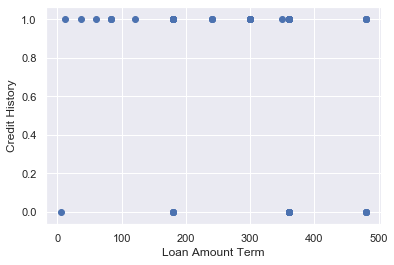

In [26]:
plt.scatter(test13.Loan_Amount_Term, test13.Credit_History)
plt.xlabel('Loan Amount Term')
plt.ylabel('Credit History');

In [27]:
Credit_History = test13.Credit_History

In [28]:
test14 = test13.drop('Credit_History', axis='columns')

In [29]:
test14.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Female', 'Male', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Self_Employed_Yes', 'Graduate',
       'Area_Semiurban', 'Area_Urban'],
      dtype='object')

In [30]:
test14.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Female,Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Self_Employed_Yes,Graduate,Area_Semiurban,Area_Urban
0,5720,0,110.0,360.0,0,1,1,1,0,0,0,1,0,1
1,3076,1500,126.0,360.0,0,1,1,0,1,0,0,1,0,1
2,5000,1800,208.0,360.0,0,1,1,0,0,1,0,1,0,1
3,2340,2546,100.0,360.0,0,1,1,0,0,1,0,1,0,1
4,3276,0,78.0,360.0,0,1,0,1,0,0,0,0,0,1


In [31]:
impft = imp.fit_transform(test14.values)

In [32]:
test14.iloc[:,3]

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
362    360.0
363    360.0
364    360.0
365    360.0
366    180.0
Name: Loan_Amount_Term, Length: 367, dtype: float64

In [33]:
impft[:50,3]

array([360.        , 360.        , 360.        , 360.        ,
       360.        , 360.        , 360.        , 360.        ,
       240.        , 360.        , 360.        , 360.        ,
       180.        , 360.        , 360.        , 360.        ,
       360.        , 360.        , 360.        , 180.        ,
       360.        , 180.        , 360.        , 360.        ,
       360.        , 360.        , 360.        , 360.        ,
       360.        , 180.        , 360.        , 360.        ,
       360.        , 360.        , 360.        , 360.        ,
       180.        , 360.        , 360.        , 360.        ,
       360.        , 360.        , 360.        , 360.        ,
       360.        , 342.14010073, 360.        , 360.        ,
       342.80619126, 360.        ])

In [35]:
test15 = test13.copy()

In [36]:
test15.Loan_Amount_Term = impft[:,3]

In [37]:
test15.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Female,Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Self_Employed_Yes,Graduate,Area_Semiurban,Area_Urban
0,5720,0,110.0,360.0,1.0,0,1,1,1,0,0,0,1,0,1
1,3076,1500,126.0,360.0,1.0,0,1,1,0,1,0,0,1,0,1
2,5000,1800,208.0,360.0,1.0,0,1,1,0,0,1,0,1,0,1
3,2340,2546,100.0,360.0,NaN,0,1,1,0,0,1,0,1,0,1
4,3276,0,78.0,360.0,1.0,0,1,0,1,0,0,0,0,0,1


#### preparing Credit_History column

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
itim = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=20, random_state=0)

In [40]:
test16 = test15.copy()

In [41]:
imv = itim.fit_transform(test16.values)
imv

array([[5.720e+03, 0.000e+00, 1.100e+02, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [3.076e+03, 1.500e+03, 1.260e+02, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [5.000e+03, 1.800e+03, 2.080e+02, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       ...,
       [3.250e+03, 1.993e+03, 1.260e+02, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.000e+03, 2.393e+03, 1.580e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [9.200e+03, 0.000e+00, 9.800e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [42]:
imv[:,14]

array([1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1.

In [43]:
test16.Credit_History = imv[:,14]

In [44]:
test16.isnull().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Female               0
Male                 0
Married_Yes          0
Dependents_0         0
Dependents_1         0
Dependents_2         0
Self_Employed_Yes    0
Graduate             0
Area_Semiurban       0
Area_Urban           0
dtype: int64

#### Exporting Cleaned data to external csv file.

In [46]:
test16.to_csv('./test16.csv', encoding='utf-8', index=False, columns=test16.columns)

In [48]:
Loan_id.to_csv('./loan_id.csv', encoding='utf-8', index=False)

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
test.shape, test3.shape